### by default, anything imported is set to device CPU

### to avoid error, check .device of everything if device error occurs

In [164]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs # enables customization of dataset features


In [165]:
# Setting hyperparameters for data creation

# Its common to write hyperparameters in capital form when start of the notebook
NUM_CLASSES = 4
NUM_FEATURES = 2

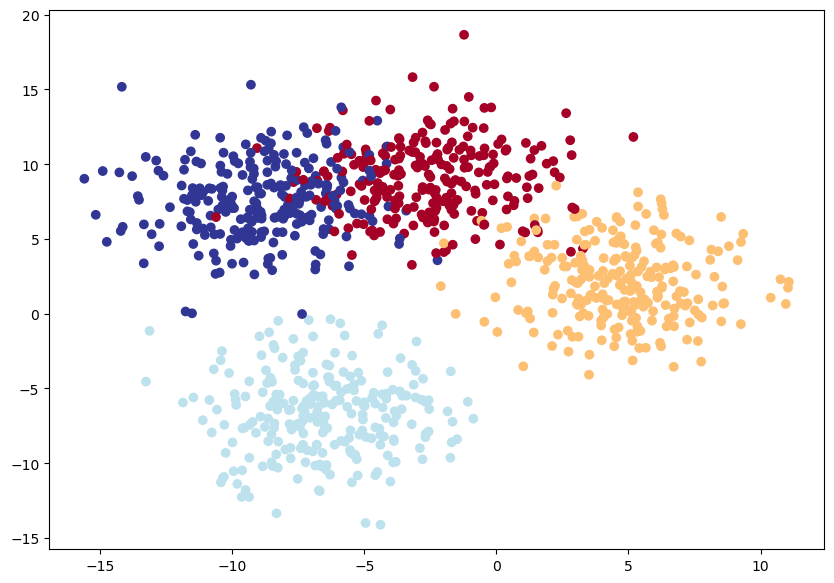

In [166]:
# Creating multiclass data
X_blob, y_blob = make_blobs(n_samples = 1000,
                          n_features = NUM_FEATURES,
                          centers = NUM_CLASSES,
                          cluster_std = 2.5, # gives data clusters a little shake up
                          random_state = 42)

# Turning data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) #Binary Cross Entropy loss functions expects longTensor datatype

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, train_size = 0.8, random_state = 42)


# Plotting data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)
plt.show()

### Building a multiclass classification model in python

In [167]:
class blob_model(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        """
        Initializes multiclass classification model
        
        Args:
        input_features (int) : Number of input features to the model
        output_features (int) : Number of output features (number of output classes)
        hidden_units (int) : Number of hidden units between layers, default = 8
        """
        super().__init__()
        
        self.linear_layer_stack = nn.Sequential(
                nn.Linear(in_features = input_features, out_features = hidden_units),
                nn.ReLU(),
                nn.Linear(in_features = hidden_units, out_features = hidden_units),
                nn.ReLU(),
                nn.Linear(in_features = hidden_units, out_features = hidden_units),
                nn.ReLU(),
                nn.Linear(in_features = hidden_units, out_features = output_features))
        
        
    def forward(self, x):
        return self.linear_layer_stack(x)

In [168]:
device = 'cuda' if torch.cuda.is_available else 'cpu'  # GPU is selected if available else CPU

In [169]:
def accuracy_fn(y_truth, y_preds):
    correct = torch.eq(y_truth, y_preds).sum().item()
    acc = correct/len(y_truth) * 100
    acc = round(acc, 2)
    return acc
    

In [170]:
model1 = blob_model(input_features = 2, hidden_units = 20, output_features = 4)

In [188]:
model1.to(device) # device = 'cuda' if available else 'cpu'. cuda is a GPU
X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# define loss function
loss_fn = nn.CrossEntropyLoss()

# define optimizer
optimizer = torch.optim.SGD(model1.parameters(), lr = 0.1)

# -----------------------------train----------------------------
epochs = 10000

for epoch in range(epochs):
    
    # Set model in train mode
    model1.train()
    
    train_logits = model1(X_blob_train)
    
    train_loss = loss_fn(train_logits, y_blob_train)
    train_preds = torch.softmax(train_logits, dim = 1).argmax(dim = 1) # argmax() gives the index of maximum value in given dimension
    train_accuracy = accuracy_fn(y_blob_train, train_preds)
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()
    
    # -----------------------------test------------------------------
    
    # Set model to evaluation mode
    model1.eval()
    
    with torch.inference_mode():
        test_logits = model1(X_blob_test)
        test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
        test_accuracy = accuracy_fn(y_blob_test, test_preds)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        
    if epoch % 10 == 0:
        print(f"\nepoch : {epoch}\nTraining accuracy : {train_accuracy}% | Test accuracy : {test_accuracy}%\nTraining loss : {train_loss:.4f} | Test loss : {test_loss:.4f}")
    



epoch : 0
Training accuracy : 91.62% | Test accuracy : 93.5%
Training loss : 0.1947 | Test loss : 0.1475

epoch : 10
Training accuracy : 92.0% | Test accuracy : 94.0%
Training loss : 0.1871 | Test loss : 0.1432

epoch : 20
Training accuracy : 92.5% | Test accuracy : 94.0%
Training loss : 0.1813 | Test loss : 0.1411

epoch : 30
Training accuracy : 92.5% | Test accuracy : 94.5%
Training loss : 0.1807 | Test loss : 0.1398

epoch : 40
Training accuracy : 92.25% | Test accuracy : 94.5%
Training loss : 0.1850 | Test loss : 0.1401

epoch : 50
Training accuracy : 92.25% | Test accuracy : 94.5%
Training loss : 0.1832 | Test loss : 0.1385

epoch : 60
Training accuracy : 93.0% | Test accuracy : 94.5%
Training loss : 0.1762 | Test loss : 0.1369

epoch : 70
Training accuracy : 92.75% | Test accuracy : 95.0%
Training loss : 0.1759 | Test loss : 0.1358

epoch : 80
Training accuracy : 92.5% | Test accuracy : 95.0%
Training loss : 0.1816 | Test loss : 0.1365

epoch : 90
Training accuracy : 92.62% | Te


epoch : 800
Training accuracy : 94.0% | Test accuracy : 95.0%
Training loss : 0.1518 | Test loss : 0.1101

epoch : 810
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1530 | Test loss : 0.1097

epoch : 820
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1529 | Test loss : 0.1097

epoch : 830
Training accuracy : 94.0% | Test accuracy : 95.0%
Training loss : 0.1514 | Test loss : 0.1100

epoch : 840
Training accuracy : 94.0% | Test accuracy : 95.0%
Training loss : 0.1505 | Test loss : 0.1103

epoch : 850
Training accuracy : 93.88% | Test accuracy : 95.0%
Training loss : 0.1502 | Test loss : 0.1102

epoch : 860
Training accuracy : 93.88% | Test accuracy : 95.0%
Training loss : 0.1509 | Test loss : 0.1097

epoch : 870
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1519 | Test loss : 0.1093

epoch : 880
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1518 | Test loss : 0.1092

epoch : 890
Training accuracy 


epoch : 1620
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1467 | Test loss : 0.1074

epoch : 1630
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1466 | Test loss : 0.1074

epoch : 1640
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1466 | Test loss : 0.1073

epoch : 1650
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1466 | Test loss : 0.1073

epoch : 1660
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1468 | Test loss : 0.1071

epoch : 1670
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1469 | Test loss : 0.1071

epoch : 1680
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1468 | Test loss : 0.1071

epoch : 1690
Training accuracy : 93.75% | Test accuracy : 95.5%
Training loss : 0.1465 | Test loss : 0.1073

epoch : 1700
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1463 | Test loss : 0.1075

epoch : 1710
Train


epoch : 2440
Training accuracy : 93.75% | Test accuracy : 95.0%
Training loss : 0.1444 | Test loss : 0.1071

epoch : 2450
Training accuracy : 93.75% | Test accuracy : 95.0%
Training loss : 0.1441 | Test loss : 0.1074

epoch : 2460
Training accuracy : 93.75% | Test accuracy : 95.0%
Training loss : 0.1440 | Test loss : 0.1074

epoch : 2470
Training accuracy : 93.75% | Test accuracy : 95.0%
Training loss : 0.1441 | Test loss : 0.1072

epoch : 2480
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1444 | Test loss : 0.1067

epoch : 2490
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1447 | Test loss : 0.1065

epoch : 2500
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1448 | Test loss : 0.1065

epoch : 2510
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1444 | Test loss : 0.1068

epoch : 2520
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1443 | Test loss : 0.1070

epoch : 2530
Trainin


epoch : 3240
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1434 | Test loss : 0.1064

epoch : 3250
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1425 | Test loss : 0.1075

epoch : 3260
Training accuracy : 93.75% | Test accuracy : 95.0%
Training loss : 0.1421 | Test loss : 0.1082

epoch : 3270
Training accuracy : 93.75% | Test accuracy : 95.0%
Training loss : 0.1422 | Test loss : 0.1080

epoch : 3280
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1423 | Test loss : 0.1077

epoch : 3290
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1425 | Test loss : 0.1072

epoch : 3300
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1428 | Test loss : 0.1067

epoch : 3310
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1436 | Test loss : 0.1058

epoch : 3320
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1445 | Test loss : 0.1053

epoch : 3330
Trainin


epoch : 4060
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1427 | Test loss : 0.1055

epoch : 4070
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1429 | Test loss : 0.1055

epoch : 4080
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1420 | Test loss : 0.1065

epoch : 4090
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1412 | Test loss : 0.1076

epoch : 4100
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1411 | Test loss : 0.1078

epoch : 4110
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1411 | Test loss : 0.1076

epoch : 4120
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1413 | Test loss : 0.1072

epoch : 4130
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1416 | Test loss : 0.1068

epoch : 4140
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1419 | Test loss : 0.1062

epoch : 4150
Training acc


epoch : 4820
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1399 | Test loss : 0.1087

epoch : 4830
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1398 | Test loss : 0.1088

epoch : 4840
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1400 | Test loss : 0.1081

epoch : 4850
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1404 | Test loss : 0.1070

epoch : 4860
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1412 | Test loss : 0.1058

epoch : 4870
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1425 | Test loss : 0.1047

epoch : 4880
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1421 | Test loss : 0.1051

epoch : 4890
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1408 | Test loss : 0.1065

epoch : 4900
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1399 | Test loss : 0.1082

epoch : 4910
Training


epoch : 5600
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1393 | Test loss : 0.1068

epoch : 5610
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1404 | Test loss : 0.1054

epoch : 5620
Training accuracy : 93.62% | Test accuracy : 96.0%
Training loss : 0.1414 | Test loss : 0.1046

epoch : 5630
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1413 | Test loss : 0.1049

epoch : 5640
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1398 | Test loss : 0.1062

epoch : 5650
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1390 | Test loss : 0.1072

epoch : 5660
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1388 | Test loss : 0.1077

epoch : 5670
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1390 | Test loss : 0.1073

epoch : 5680
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1398 | Test loss : 0.1058

epoch : 5690
Training a


epoch : 6410
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1382 | Test loss : 0.1071

epoch : 6420
Training accuracy : 93.38% | Test accuracy : 95.0%
Training loss : 0.1378 | Test loss : 0.1077

epoch : 6430
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1383 | Test loss : 0.1065

epoch : 6440
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1403 | Test loss : 0.1046

epoch : 6450
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1405 | Test loss : 0.1049

epoch : 6460
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1386 | Test loss : 0.1066

epoch : 6470
Training accuracy : 93.62% | Test accuracy : 95.0%
Training loss : 0.1380 | Test loss : 0.1072

epoch : 6480
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1383 | Test loss : 0.1065

epoch : 6490
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1398 | Test loss : 0.1049

epoch : 6500
Training a


epoch : 7230
Training accuracy : 93.5% | Test accuracy : 95.0%
Training loss : 0.1367 | Test loss : 0.1072

epoch : 7240
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1377 | Test loss : 0.1055

epoch : 7250
Training accuracy : 93.88% | Test accuracy : 96.0%
Training loss : 0.1404 | Test loss : 0.1040

epoch : 7260
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1392 | Test loss : 0.1051

epoch : 7270
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1371 | Test loss : 0.1065

epoch : 7280
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1369 | Test loss : 0.1068

epoch : 7290
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1382 | Test loss : 0.1052

epoch : 7300
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1390 | Test loss : 0.1047

epoch : 7310
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1383 | Test loss : 0.1056

epoch : 7320
Training a


epoch : 8010
Training accuracy : 93.88% | Test accuracy : 96.0%
Training loss : 0.1397 | Test loss : 0.1043

epoch : 8020
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1373 | Test loss : 0.1054

epoch : 8030
Training accuracy : 93.25% | Test accuracy : 95.5%
Training loss : 0.1363 | Test loss : 0.1061

epoch : 8040
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1360 | Test loss : 0.1063

epoch : 8050
Training accuracy : 93.88% | Test accuracy : 95.5%
Training loss : 0.1387 | Test loss : 0.1043

epoch : 8060
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1382 | Test loss : 0.1051

epoch : 8070
Training accuracy : 93.25% | Test accuracy : 95.5%
Training loss : 0.1365 | Test loss : 0.1058

epoch : 8080
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1369 | Test loss : 0.1053

epoch : 8090
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1382 | Test loss : 0.1046

epoch : 8100
Training 


epoch : 8830
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1364 | Test loss : 0.1046

epoch : 8840
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1375 | Test loss : 0.1044

epoch : 8850
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1372 | Test loss : 0.1048

epoch : 8860
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1353 | Test loss : 0.1060

epoch : 8870
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1347 | Test loss : 0.1060

epoch : 8880
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1374 | Test loss : 0.1040

epoch : 8890
Training accuracy : 93.88% | Test accuracy : 95.5%
Training loss : 0.1383 | Test loss : 0.1043

epoch : 8900
Training accuracy : 93.5% | Test accuracy : 95.5%
Training loss : 0.1367 | Test loss : 0.1053

epoch : 8910
Training accuracy : 93.25% | Test accuracy : 96.0%
Training loss : 0.1343 | Test loss : 0.1068

epoch : 8920
Traini


epoch : 9590
Training accuracy : 93.25% | Test accuracy : 95.5%
Training loss : 0.1343 | Test loss : 0.1047

epoch : 9600
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1355 | Test loss : 0.1041

epoch : 9610
Training accuracy : 93.88% | Test accuracy : 95.5%
Training loss : 0.1376 | Test loss : 0.1035

epoch : 9620
Training accuracy : 93.88% | Test accuracy : 95.5%
Training loss : 0.1373 | Test loss : 0.1037

epoch : 9630
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1353 | Test loss : 0.1049

epoch : 9640
Training accuracy : 93.38% | Test accuracy : 95.5%
Training loss : 0.1341 | Test loss : 0.1056

epoch : 9650
Training accuracy : 93.25% | Test accuracy : 96.0%
Training loss : 0.1331 | Test loss : 0.1065

epoch : 9660
Training accuracy : 93.62% | Test accuracy : 95.5%
Training loss : 0.1350 | Test loss : 0.1039

epoch : 9670
Training accuracy : 93.88% | Test accuracy : 95.5%
Training loss : 0.1367 | Test loss : 0.1036

epoch : 9680
Train

In [189]:
model1.eval()
with torch.inference_mode():
    y_preds = torch.softmax(model1(X_blob_test), dim = 1).argmax(dim = 1)
    
    
    

In [190]:
from helper_functions import plot_decision_boundary

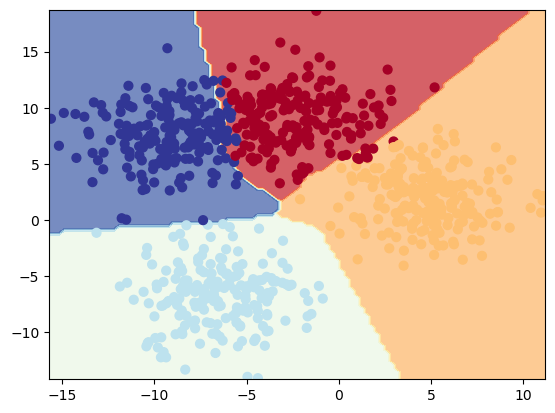

In [191]:
plot_decision_boundary(model1, X_blob_train, train_preds)

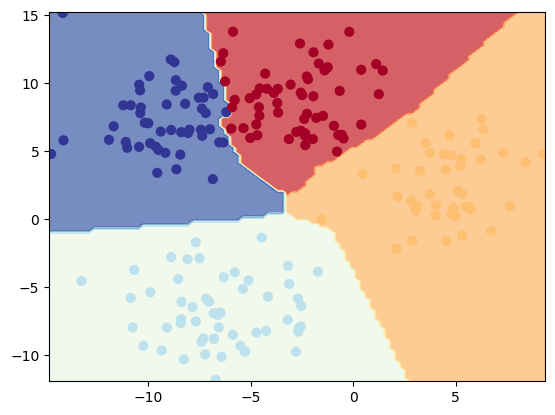

In [192]:
plot_decision_boundary(model1, X_blob_test, y_preds)

In [193]:
test_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 2, 3, 3, 0, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 0, 1, 0,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 0, 1, 0, 2, 0, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 0, 0, 2, 3, 1, 3, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 0, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 1, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [194]:
accuracy_fn(y_blob_test, y_preds)

94.0

In [195]:
from torchmetrics import Accuracy

In [196]:
torchmetric_accuracy = Accuracy(task = 'multiclass', num_classes = 4).to(device)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9400, device='cuda:0')

In [197]:
X_blob.shape, y_blob.shape

(torch.Size([1000, 2]), torch.Size([1000]))